In [63]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

class AnalyzeData:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        
    def read_data(self):
        try:
            self.data = pd.read_csv(self.file_path, header=0)
            self.data['num_atoms'] = self.data['data_file'].str.extract(r'(\d+)').astype(int)
            print("Data loaded successfully.")
        except FileNotFoundError:
            print("File not found. Please provide a valid file path.")
        except Exception as e:
            print("An error occurred:", e)
    
    def show_data(self):
        if self.data is not None:
            print(self.data)
        else:
            print("No data loaded. Please load data first using the read_data() method.")
    
    def plot_comparison(self, data_file_number):
        if self.data is None:
            print("No data loaded. Please load data first using the read_data() method.")
            return
        filtered_data = self.data[self.data['data_file'] == f'argon{data_file_number}']        
        if filtered_data.empty:
            print(f"No data found for data file number {data_file_number}.")
            return
        
        # Define unique colors for different simulation methods
        colors = {'Bruteforce': 'red','Double Increment': 'salmon','MPI Cyclic Dist 1 Thread': 'blue','MPI Cyclic Dist 4 Threads': 'blue', 'MPI Cyclic Dist 8 Threads': 'blue', 'MPI Chunked Dist 1 Thread': 'orange','MPI Chunked Dist 4 Threads': 'orange','MPI Chunked Dist 1 Thread': 'orange','MPI Chunked Dist 8 Threads': 'orange', 'MPI Cell List 1 Thread': 'green','MPI Cell List 4 Threads': 'green','MPI Cell List 8 Threads': 'green'}
        
        plt.figure(figsize=(10, 6))
        
        # Iterate over unique simulation types and plot bars with unique colors
        for sim_type in filtered_data['sim_type'].unique():
            color = colors.get(sim_type, 'gray')  # Get color based on simulation type
            sim_data = filtered_data[filtered_data['sim_type'] == sim_type]
            plt.bar(sim_data['sim_type'], sim_data['time_taken'], color=color, label=sim_type)
        
        plt.xlabel('Simulation Method')
        plt.ylabel('Time Taken (s)')
        plt.title(f'Timing Comparison for Data File {data_file_number}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


    def create_bar_plots(self, title, atom_numbers, sim_types):
        if self.data is None:
            print("No data loaded. Please load data first using the read_data() method.")
            return
        
        filtered_data = self.data[(self.data['num_atoms'].isin(atom_numbers)) & (self.data['sim_type'].isin(sim_types))]
        
        if filtered_data.empty:
            print("No matching data found for the specified atom numbers and simulation types.")
            return
        
        num_atom_types = len(atom_numbers)
        num_sim_types = len(sim_types)
        total_width = 0.8  # Total width for all bars
        bar_width = total_width / (num_atom_types * num_sim_types)  # Fixed width for each bar
        
        num_bars = len(atom_numbers) * len(sim_types)
        if num_bars > 10:
            fig_width = min(16, num_bars * 0.8)
            fig_height = 8
        else:
            fig_width = 10
            fig_height = 6
        
        plt.figure(figsize=(fig_width, fig_height))
        x_positions = range(len(atom_numbers))
        for i, atom_number in enumerate(atom_numbers):
            for j, sim_type in enumerate(sim_types):
                data_subset = filtered_data[(filtered_data['num_atoms'] == atom_number) & (filtered_data['sim_type'] == sim_type)]
                x_pos = [pos + j * bar_width for pos in x_positions]
                plt.bar(sim_type, data_subset['time_taken'] )
                # for pos, time_taken in zip(x_pos, data_subset['time_taken']):
                    # plt.text(pos, time_taken, f"{sim_type}", ha='center', va='bottom', wrap=True)
                x_positions = [pos + total_width for pos in x_positions]  # Move to the next set of bars
        plt.xlabel('Atom Number - Simulation Type')
        plt.ylabel('Time Taken (s)')
        plt.title(title)
        plt.xticks(rotation=30, ha='right')
        plt.tight_layout()
        plt.show()
    
    def analyze_neighbours(self,file_path):
        try:
            # Read the numbers from the file
            with open(file_path, 'r') as file:
                numbers_list = [int(num) for num in file.read().split() if num.isdigit()]

            if numbers_list:
                mean = sum(numbers_list) / len(numbers_list)
                maximum = max(numbers_list)
                minimum = min(numbers_list)
                print("Mean number of neighbors:", "{:.2f}".format(mean))
                print("Maximum number of neighbors:", maximum)
                print("Minimum number of neighbors:", minimum)
            else:
                print("No valid integer values found in the file.")
        except FileNotFoundError:
            print("Error: The file does not exist.")
        except ValueError as ve:
            print(f"Error: {ve}. Please provide a file with valid integer values.")
        except Exception as e:
            print("An error occurred:", e)


In [65]:
neighbourAnalyzer = AnalyzeData('./timings.csv')

neighbourAnalyzer.read_data()



Data loaded successfully.


In [66]:
neighbourAnalyzer.analyze_neighbours("./argon147023_neighbours.txt")

Mean number of neighbors: 52.31
Maximum number of neighbors: 71
Minimum number of neighbors: 12


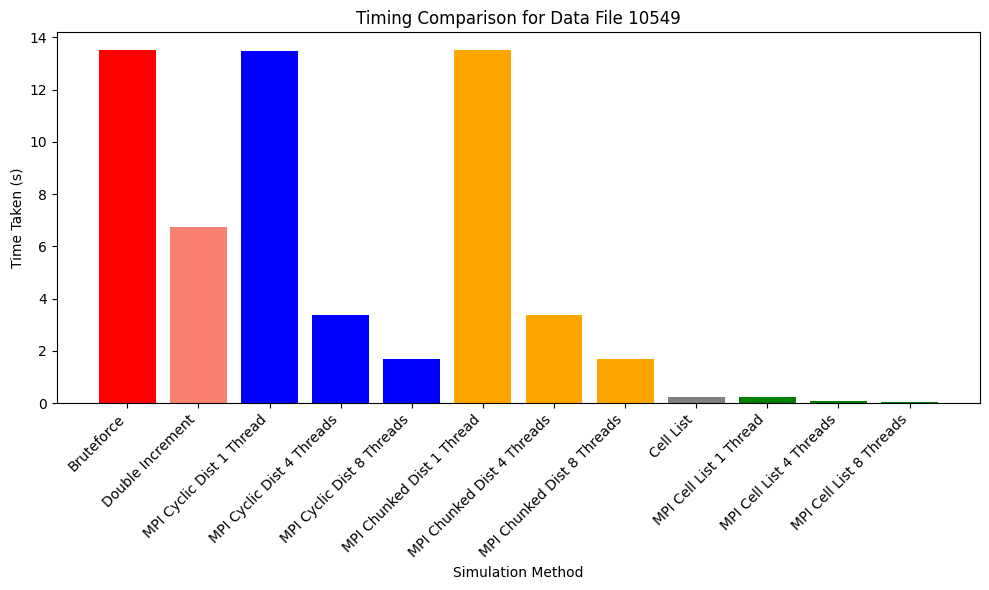

In [71]:
neighbourAnalyzer.plot_comparison('10549')

Cell List for 120 

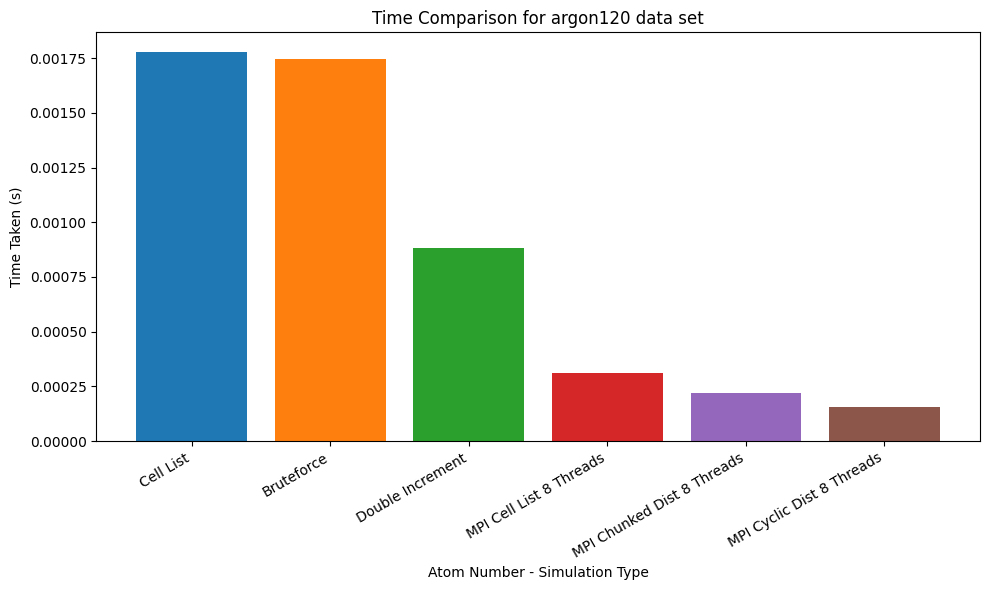

In [68]:
neighbourAnalyzer.create_bar_plots("Time Comparison for argon120 data set",[120],["Cell List","Bruteforce","Double Increment","MPI Cell List 8 Threads","MPI Chunked Dist 8 Threads","MPI Cyclic Dist 8 Threads"])

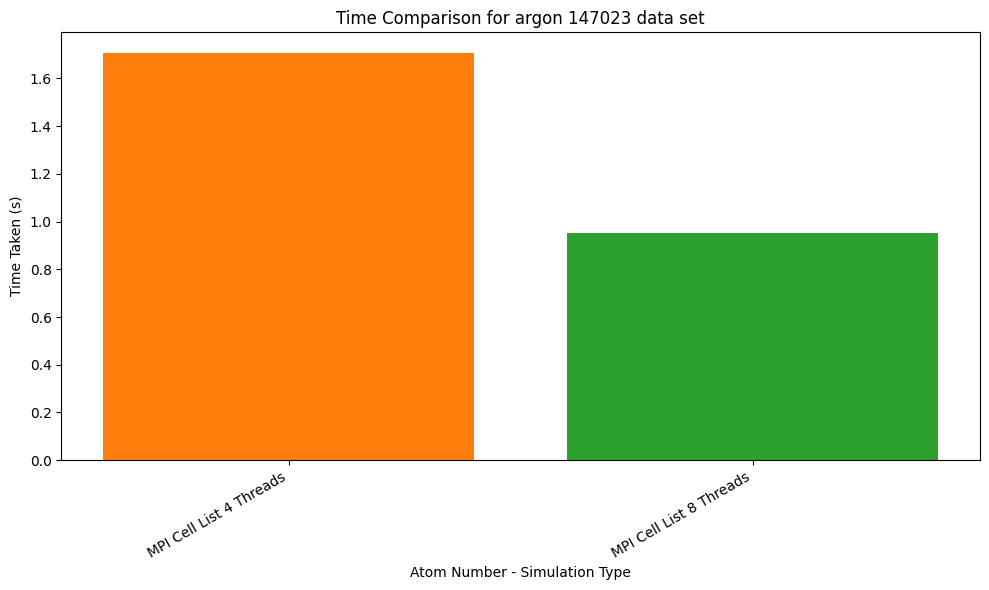

In [76]:
neighbourAnalyzer.create_bar_plots("Time Comparison for argon 147023 data set",[147023],["MPI Cell List 1 Thread","MPI Cell List 4 Threads","MPI Cell List 8 Threads"])

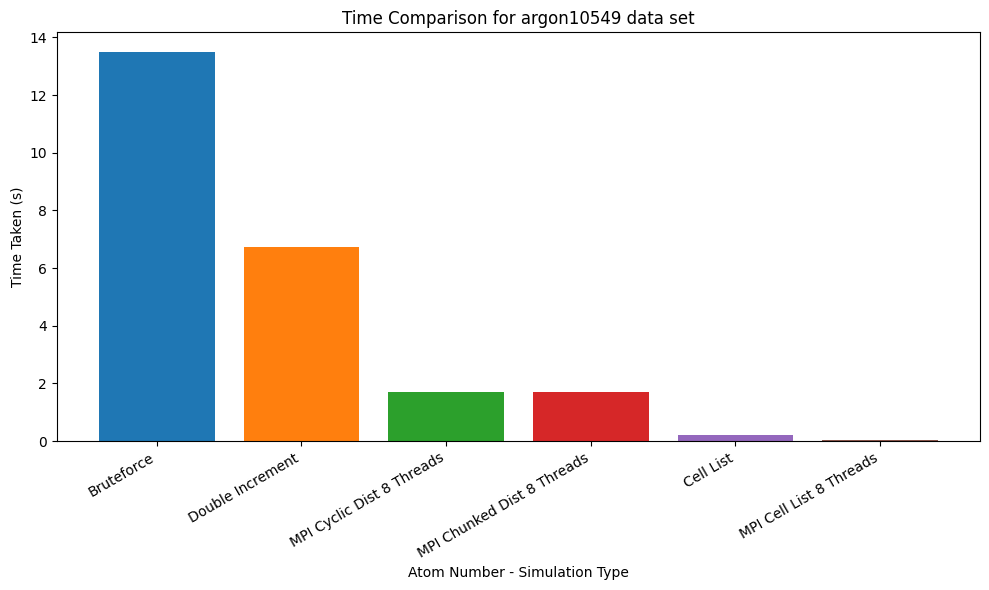

In [69]:
neighbourAnalyzer.create_bar_plots("Time Comparison for argon10549 data set",[10549],["Bruteforce","Double Increment","MPI Cyclic Dist 8 Threads","MPI Chunked Dist 8 Threads","Cell List","MPI Cell List 8 Threads"])

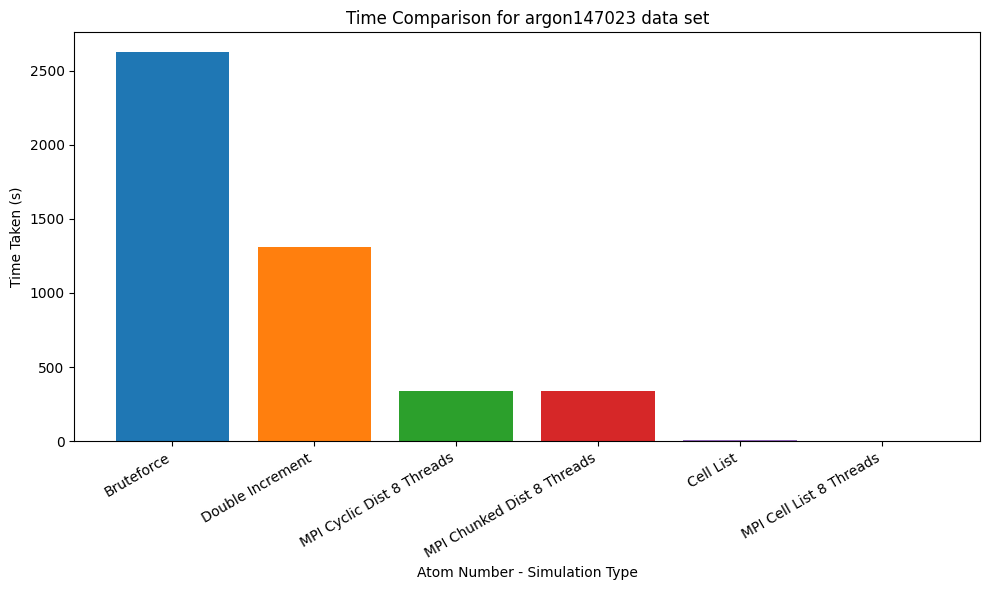

In [70]:
neighbourAnalyzer.create_bar_plots("Time Comparison for argon147023 data set",[147023],["Bruteforce","Double Increment","MPI Cyclic Dist 8 Threads","MPI Chunked Dist 8 Threads","Cell List","MPI Cell List 8 Threads"])